   #### Mawrer Amed Ramirez Martinez ms723737@iteso.mx
   #### Avance de TOG IDI 4

#  Ajuste de Dataset (Preparacion)


In [6]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure
import seaborn as sns
import pandas as pd
import os, glob

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
SOURCE_TYPE = "EURUSD_FULL"
FRECUENCIA = "4H"
NUM_FEATURES = 0

In [9]:
pwd = os.getcwd()
datasource_path = os.path.join(pwd, r'../../../Datasets/Junio2020/dukas/EURUSD/'+FRECUENCIA+'/')
filenames = glob.glob(datasource_path + "/*.csv")
filenames.sort()
for file in filenames:
    print(os.path.basename(file))

EURUSD_Candlestick_4_Hour_ASK_31.12.2003-30.05.2020.csv
EURUSD_Candlestick_4_Hour_BID_31.12.2003-30.05.2020.csv


## Read CSV

### Read Ask Dataset

In [10]:
index_ask = 0
dateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%Y %H:%M:%S.%f')
DATASET_ASK = pd.read_csv(filenames[index_ask], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
print(DATASET_ASK)
print(DATASET_ASK.shape)

                 Gmt time     Open     High      Low    Close       Volume
0     2004-01-01 00:00:00  1.25950  1.25965  1.25826  1.25869   19408.8998
1     2004-01-01 04:00:00  1.25908  1.25960  1.24698  1.25910   41634.6001
2     2004-01-01 08:00:00  1.25900  1.25953  1.25723  1.25785   23757.6001
3     2004-01-01 12:00:00  1.25785  1.26052  1.25727  1.25911   25753.3003
4     2004-01-01 16:00:00  1.25905  1.25968  1.25371  1.25461  234854.4999
...                   ...      ...      ...      ...      ...          ...
26489 2020-05-29 08:00:00  1.11051  1.11420  1.10962  1.11354   74257.9698
26490 2020-05-29 12:00:00  1.11355  1.11452  1.10944  1.11070  113196.9590
26491 2020-05-29 16:00:00  1.11069  1.11112  1.10811  1.10998   54751.2294
26492 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071    4646.7427
26493 2020-05-31 20:00:00  1.11213  1.11217  1.11028  1.11158   10126.4174

[26494 rows x 6 columns]
(26494, 6)


### Read Bid Dataset

In [11]:
index_bid = 1
dateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%Y %H:%M:%S.%f')
DATASET_BID = pd.read_csv(filenames[index_bid], header=0, parse_dates=['Gmt time'], date_parser=dateparse, 
                          names=['Gmt time','Open_Bid','High_Bid',"Low_Bid","Close_Bid","Volume_Bid"])
print(DATASET_BID)
print(DATASET_BID.shape)

                 Gmt time  Open_Bid  High_Bid  Low_Bid  Close_Bid   Volume_Bid
0     2004-01-01 00:00:00   1.25934   1.25953  1.25814    1.25854   23473.5999
1     2004-01-01 04:00:00   1.25898   1.25948  1.24679    1.25900   48684.6006
2     2004-01-01 08:00:00   1.25884   1.25938  1.25709    1.25775   27086.9995
3     2004-01-01 12:00:00   1.25775   1.26035  1.25710    1.25897   32530.2993
4     2004-01-01 16:00:00   1.25890   1.25958  1.25357    1.25451  288977.2969
...                   ...       ...       ...      ...        ...          ...
26489 2020-05-29 08:00:00   1.11049   1.11417  1.10959    1.11352   64556.8799
26490 2020-05-29 12:00:00   1.11354   1.11451  1.10940    1.11067  195899.7617
26491 2020-05-29 16:00:00   1.11067   1.11111  1.10809    1.10997   53543.9307
26492 2020-05-29 20:00:00   1.10993   1.11085  1.10979    1.11036    4041.1875
26493 2020-05-31 20:00:00   1.11129   1.11195  1.11023    1.11156    9217.4834

[26494 rows x 6 columns]
(26494, 6)


### Merge 2 Datasets ASK + BID

In [12]:
DATASET_FULL = pd.merge(DATASET_ASK,DATASET_BID)
print(DATASET_FULL)

                 Gmt time     Open     High      Low    Close       Volume  \
0     2004-01-01 00:00:00  1.25950  1.25965  1.25826  1.25869   19408.8998   
1     2004-01-01 04:00:00  1.25908  1.25960  1.24698  1.25910   41634.6001   
2     2004-01-01 08:00:00  1.25900  1.25953  1.25723  1.25785   23757.6001   
3     2004-01-01 12:00:00  1.25785  1.26052  1.25727  1.25911   25753.3003   
4     2004-01-01 16:00:00  1.25905  1.25968  1.25371  1.25461  234854.4999   
...                   ...      ...      ...      ...      ...          ...   
26489 2020-05-29 08:00:00  1.11051  1.11420  1.10962  1.11354   74257.9698   
26490 2020-05-29 12:00:00  1.11355  1.11452  1.10944  1.11070  113196.9590   
26491 2020-05-29 16:00:00  1.11069  1.11112  1.10811  1.10998   54751.2294   
26492 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071    4646.7427   
26493 2020-05-31 20:00:00  1.11213  1.11217  1.11028  1.11158   10126.4174   

       Open_Bid  High_Bid  Low_Bid  Close_Bid   Volume_Bid  
0 

### Add Col 'Spread' 

In [13]:
DATASET_FULL['Spread'] = DATASET_FULL['Close'] - DATASET_FULL['Close_Bid']
print(DATASET_FULL['Spread'].describe())
print(DATASET_FULL.head(5))

count    26494.000000
mean         0.000085
std          0.000082
min          0.000010
25%          0.000030
50%          0.000070
75%          0.000100
max          0.002280
Name: Spread, dtype: float64
             Gmt time     Open     High      Low    Close       Volume  \
0 2004-01-01 00:00:00  1.25950  1.25965  1.25826  1.25869   19408.8998   
1 2004-01-01 04:00:00  1.25908  1.25960  1.24698  1.25910   41634.6001   
2 2004-01-01 08:00:00  1.25900  1.25953  1.25723  1.25785   23757.6001   
3 2004-01-01 12:00:00  1.25785  1.26052  1.25727  1.25911   25753.3003   
4 2004-01-01 16:00:00  1.25905  1.25968  1.25371  1.25461  234854.4999   

   Open_Bid  High_Bid  Low_Bid  Close_Bid   Volume_Bid   Spread  
0   1.25934   1.25953  1.25814    1.25854   23473.5999  0.00015  
1   1.25898   1.25948  1.24679    1.25900   48684.6006  0.00010  
2   1.25884   1.25938  1.25709    1.25775   27086.9995  0.00010  
3   1.25775   1.26035  1.25710    1.25897   32530.2993  0.00014  
4   1.25890   1.2595

### Add Col 'day_name' and 'weekday'

In [14]:
DATASET_FULL['day_name'] = DATASET_FULL['Gmt time'].dt.day_name()
DATASET_FULL['weekday'] = DATASET_FULL['Gmt time'].dt.weekday
print(DATASET_FULL.head(5))

             Gmt time     Open     High      Low    Close       Volume  \
0 2004-01-01 00:00:00  1.25950  1.25965  1.25826  1.25869   19408.8998   
1 2004-01-01 04:00:00  1.25908  1.25960  1.24698  1.25910   41634.6001   
2 2004-01-01 08:00:00  1.25900  1.25953  1.25723  1.25785   23757.6001   
3 2004-01-01 12:00:00  1.25785  1.26052  1.25727  1.25911   25753.3003   
4 2004-01-01 16:00:00  1.25905  1.25968  1.25371  1.25461  234854.4999   

   Open_Bid  High_Bid  Low_Bid  Close_Bid   Volume_Bid   Spread  day_name  \
0   1.25934   1.25953  1.25814    1.25854   23473.5999  0.00015  Thursday   
1   1.25898   1.25948  1.24679    1.25900   48684.6006  0.00010  Thursday   
2   1.25884   1.25938  1.25709    1.25775   27086.9995  0.00010  Thursday   
3   1.25775   1.26035  1.25710    1.25897   32530.2993  0.00014  Thursday   
4   1.25890   1.25958  1.25357    1.25451  288977.2969  0.00010  Thursday   

   weekday  
0        3  
1        3  
2        3  
3        3  
4        3  


### Add Col 'pct_range_Close' 

In [15]:
DATASET_FULL['Pct_Range_Close'] = DATASET_FULL['Close'].pct_change()
DATASET_FULL['Pct_Range_Close'].fillna(0, inplace=True)
print(DATASET_FULL.head())
print(DATASET_FULL.shape)


             Gmt time     Open     High      Low    Close       Volume  \
0 2004-01-01 00:00:00  1.25950  1.25965  1.25826  1.25869   19408.8998   
1 2004-01-01 04:00:00  1.25908  1.25960  1.24698  1.25910   41634.6001   
2 2004-01-01 08:00:00  1.25900  1.25953  1.25723  1.25785   23757.6001   
3 2004-01-01 12:00:00  1.25785  1.26052  1.25727  1.25911   25753.3003   
4 2004-01-01 16:00:00  1.25905  1.25968  1.25371  1.25461  234854.4999   

   Open_Bid  High_Bid  Low_Bid  Close_Bid   Volume_Bid   Spread  day_name  \
0   1.25934   1.25953  1.25814    1.25854   23473.5999  0.00015  Thursday   
1   1.25898   1.25948  1.24679    1.25900   48684.6006  0.00010  Thursday   
2   1.25884   1.25938  1.25709    1.25775   27086.9995  0.00010  Thursday   
3   1.25775   1.26035  1.25710    1.25897   32530.2993  0.00014  Thursday   
4   1.25890   1.25958  1.25357    1.25451  288977.2969  0.00010  Thursday   

   weekday  Pct_Range_Close  
0        3         0.000000  
1        3         0.000326  
2 

### Differnce Function

In [16]:
def difference(dataset, interval, col_name):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.DataFrame(diff, columns = [col_name + "_diff"])

### Add Col 'Pct_Range_Close_diff' 

In [17]:
DATASET_FULL['Pct_Range_Close_diff'] = difference(DATASET_FULL['Pct_Range_Close'],1,'Pct_Range_Close').shift(1)
DATASET_FULL['Pct_Range_Close_diff'].fillna(0, inplace=True)
print(DATASET_FULL.head())
print(DATASET_FULL.shape)

             Gmt time     Open     High      Low    Close       Volume  \
0 2004-01-01 00:00:00  1.25950  1.25965  1.25826  1.25869   19408.8998   
1 2004-01-01 04:00:00  1.25908  1.25960  1.24698  1.25910   41634.6001   
2 2004-01-01 08:00:00  1.25900  1.25953  1.25723  1.25785   23757.6001   
3 2004-01-01 12:00:00  1.25785  1.26052  1.25727  1.25911   25753.3003   
4 2004-01-01 16:00:00  1.25905  1.25968  1.25371  1.25461  234854.4999   

   Open_Bid  High_Bid  Low_Bid  Close_Bid   Volume_Bid   Spread  day_name  \
0   1.25934   1.25953  1.25814    1.25854   23473.5999  0.00015  Thursday   
1   1.25898   1.25948  1.24679    1.25900   48684.6006  0.00010  Thursday   
2   1.25884   1.25938  1.25709    1.25775   27086.9995  0.00010  Thursday   
3   1.25775   1.26035  1.25710    1.25897   32530.2993  0.00014  Thursday   
4   1.25890   1.25958  1.25357    1.25451  288977.2969  0.00010  Thursday   

   weekday  Pct_Range_Close  Pct_Range_Close_diff  
0        3         0.000000             

### Accumulative Volume


In [18]:
def AQV(df):
    df['AQV'] = df['Volume'].cumsum()
    return df

In [19]:
DATASET_FULL = AQV(DATASET_FULL)
DATASET_FULL

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Spread,day_name,weekday,Pct_Range_Close,Pct_Range_Close_diff,AQV
0,2004-01-01 00:00:00,1.25950,1.25965,1.25826,1.25869,19408.8998,1.25934,1.25953,1.25814,1.25854,23473.5999,0.00015,Thursday,3,0.000000,0.000000,1.940890e+04
1,2004-01-01 04:00:00,1.25908,1.25960,1.24698,1.25910,41634.6001,1.25898,1.25948,1.24679,1.25900,48684.6006,0.00010,Thursday,3,0.000326,0.000326,6.104350e+04
2,2004-01-01 08:00:00,1.25900,1.25953,1.25723,1.25785,23757.6001,1.25884,1.25938,1.25709,1.25775,27086.9995,0.00010,Thursday,3,-0.000993,-0.001319,8.480110e+04
3,2004-01-01 12:00:00,1.25785,1.26052,1.25727,1.25911,25753.3003,1.25775,1.26035,1.25710,1.25897,32530.2993,0.00014,Thursday,3,0.001002,0.001994,1.105544e+05
4,2004-01-01 16:00:00,1.25905,1.25968,1.25371,1.25461,234854.4999,1.25890,1.25958,1.25357,1.25451,288977.2969,0.00010,Thursday,3,-0.003574,-0.004576,3.454089e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26489,2020-05-29 08:00:00,1.11051,1.11420,1.10962,1.11354,74257.9698,1.11049,1.11417,1.10959,1.11352,64556.8799,0.00002,Friday,4,0.002701,0.001304,2.122996e+09
26490,2020-05-29 12:00:00,1.11355,1.11452,1.10944,1.11070,113196.9590,1.11354,1.11451,1.10940,1.11067,195899.7617,0.00003,Friday,4,-0.002550,-0.005252,2.123110e+09
26491,2020-05-29 16:00:00,1.11069,1.11112,1.10811,1.10998,54751.2294,1.11067,1.11111,1.10809,1.10997,53543.9307,0.00001,Friday,4,-0.000648,0.001902,2.123164e+09
26492,2020-05-29 20:00:00,1.10997,1.11094,1.10982,1.11071,4646.7427,1.10993,1.11085,1.10979,1.11036,4041.1875,0.00035,Friday,4,0.000658,0.001306,2.123169e+09


In [20]:
print(DATASET_FULL['AQV'].describe())
print(DATASET_FULL['AQV'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['AQV'].isnull().sum())

count    2.649400e+04
mean     1.443047e+09
std      5.464373e+08
min      1.940890e+04
25%      1.216185e+09
50%      1.594171e+09
75%      1.807486e+09
max      2.123179e+09
Name: AQV, dtype: float64
0
0


(26494, 17)


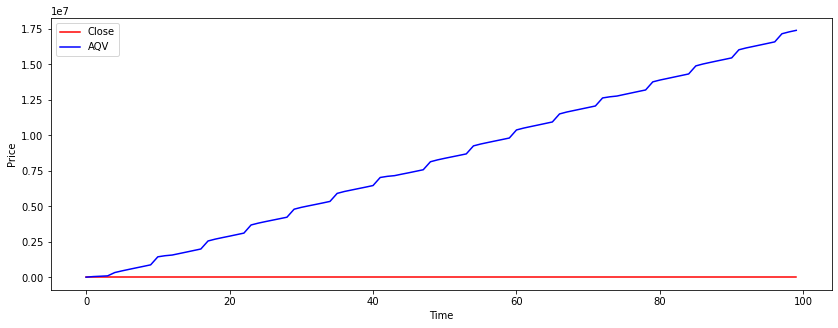

In [21]:
INICIO = 0
FIN = 100
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['AQV'][INICIO:FIN], color = 'blue', label = 'AQV')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

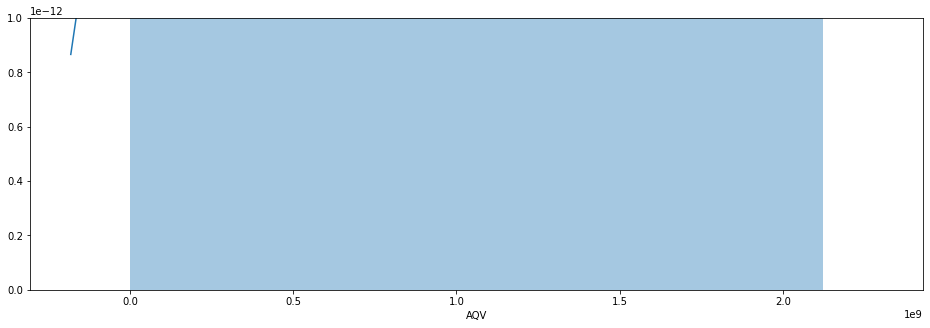

In [22]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['AQV']);

### Accumulative Pct_Range_Close_diff

In [23]:
def AQM_Pct_Range_Close_diff(df):
    df['AQM_Pct_Range_Close_diff'] = df['Pct_Range_Close_diff'].cumsum()
    return df

In [24]:
DATASET_FULL = AQM_Pct_Range_Close_diff(DATASET_FULL)
print(DATASET_FULL.head(3))

             Gmt time     Open     High      Low    Close      Volume  \
0 2004-01-01 00:00:00  1.25950  1.25965  1.25826  1.25869  19408.8998   
1 2004-01-01 04:00:00  1.25908  1.25960  1.24698  1.25910  41634.6001   
2 2004-01-01 08:00:00  1.25900  1.25953  1.25723  1.25785  23757.6001   

   Open_Bid  High_Bid  Low_Bid  Close_Bid  Volume_Bid   Spread  day_name  \
0   1.25934   1.25953  1.25814    1.25854  23473.5999  0.00015  Thursday   
1   1.25898   1.25948  1.24679    1.25900  48684.6006  0.00010  Thursday   
2   1.25884   1.25938  1.25709    1.25775  27086.9995  0.00010  Thursday   

   weekday  Pct_Range_Close  Pct_Range_Close_diff         AQV  \
0        3         0.000000              0.000000  19408.8998   
1        3         0.000326              0.000326  61043.4999   
2        3        -0.000993             -0.001319  84801.1000   

   AQM_Pct_Range_Close_diff  
0                  0.000000  
1                  0.000326  
2                 -0.000993  


In [25]:
print(DATASET_FULL['AQM_Pct_Range_Close_diff'].describe())
print(DATASET_FULL['AQM_Pct_Range_Close_diff'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['AQM_Pct_Range_Close_diff'].isnull().sum())

count    26494.000000
mean        -0.000002
std          0.002396
min         -0.031877
25%         -0.000983
50%          0.000000
75%          0.000986
max          0.029213
Name: AQM_Pct_Range_Close_diff, dtype: float64
0
0


(26494, 18)


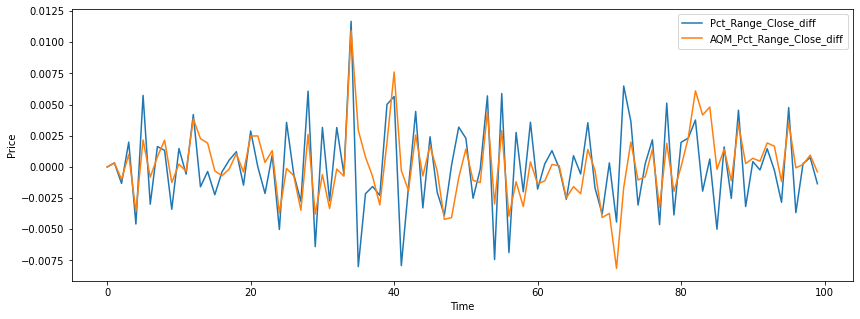

In [26]:
INICIO = 0
FIN = 100
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
#pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Pct_Range_Close_diff')
pyplot.plot(DATASET_FULL['Pct_Range_Close_diff'][INICIO:FIN], label = 'Pct_Range_Close_diff')
pyplot.plot(DATASET_FULL['AQM_Pct_Range_Close_diff'][INICIO:FIN], label = 'AQM_Pct_Range_Close_diff')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

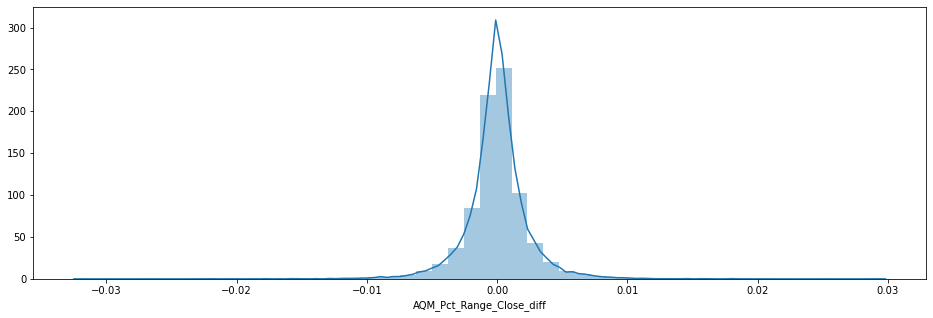

In [27]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['AQM_Pct_Range_Close_diff']);


### Accumulative Pct Change

In [28]:
def AQM_Pct_Range_Close(df):
    df['AQM_Pct_Range_Close'] = df['Pct_Range_Close'].cumsum()
    return df

In [29]:
DATASET_FULL = AQM_Pct_Range_Close(DATASET_FULL)
print(DATASET_FULL.head(3))

             Gmt time     Open     High      Low    Close      Volume  \
0 2004-01-01 00:00:00  1.25950  1.25965  1.25826  1.25869  19408.8998   
1 2004-01-01 04:00:00  1.25908  1.25960  1.24698  1.25910  41634.6001   
2 2004-01-01 08:00:00  1.25900  1.25953  1.25723  1.25785  23757.6001   

   Open_Bid  High_Bid  Low_Bid  Close_Bid  Volume_Bid   Spread  day_name  \
0   1.25934   1.25953  1.25814    1.25854  23473.5999  0.00015  Thursday   
1   1.25898   1.25948  1.24679    1.25900  48684.6006  0.00010  Thursday   
2   1.25884   1.25938  1.25709    1.25775  27086.9995  0.00010  Thursday   

   weekday  Pct_Range_Close  Pct_Range_Close_diff         AQV  \
0        3         0.000000              0.000000  19408.8998   
1        3         0.000326              0.000326  61043.4999   
2        3        -0.000993             -0.001319  84801.1000   

   AQM_Pct_Range_Close_diff  AQM_Pct_Range_Close  
0                  0.000000             0.000000  
1                  0.000326            

In [30]:
print(DATASET_FULL['AQM_Pct_Range_Close'].describe())
print(DATASET_FULL['AQM_Pct_Range_Close'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['AQM_Pct_Range_Close'].isnull().sum())

count    26494.000000
mean         0.041231
std          0.085836
min         -0.126819
25%         -0.035873
50%          0.038394
75%          0.107413
max          0.256787
Name: AQM_Pct_Range_Close, dtype: float64
0
0


(26494, 19)


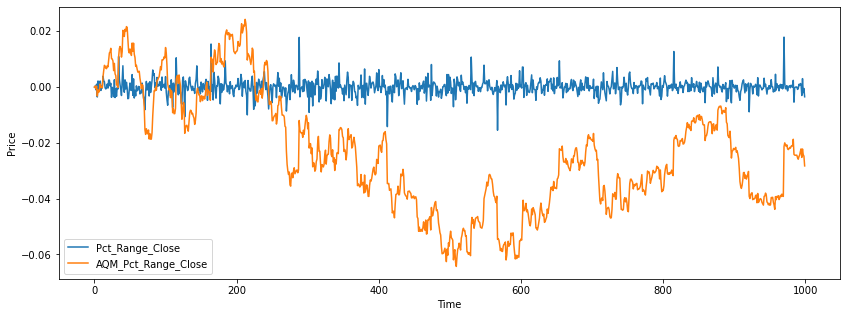

In [31]:
INICIO = 0
FIN = 1000
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
#pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Pct_Range_Close_diff')
pyplot.plot(DATASET_FULL['Pct_Range_Close'][INICIO:FIN], label = 'Pct_Range_Close')
pyplot.plot(DATASET_FULL['AQM_Pct_Range_Close'][INICIO:FIN], label = 'AQM_Pct_Range_Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

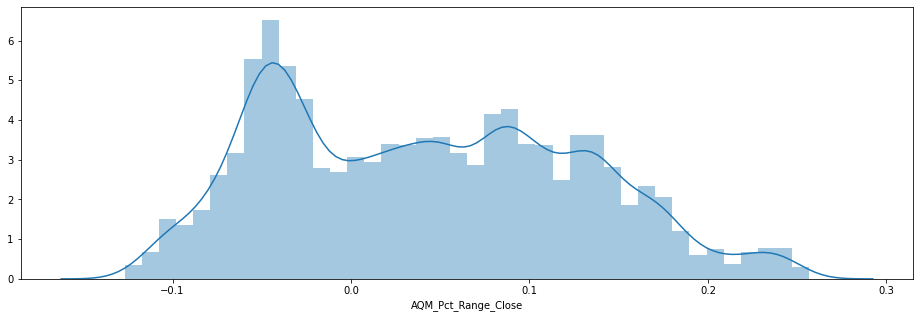

In [32]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['AQM_Pct_Range_Close']);

### Moving Average (MA) Function

In [33]:
#This function add a new column with the MA calculed, with value n
#col_name is the value to be used as base.
def MA(dataset, n, col_name, new_col): 
    MA = pd.Series(dataset[col_name].rolling(n).mean(), name = 'MA_' + col_name +'_'+ str(n)) 
    dataset = dataset.join(MA)  
    return dataset


### Add Col 'MA_Close_5' 

In [34]:
DATASET_FULL = MA(DATASET_FULL,5,'Close','MA_Close_5')
DATASET_FULL['MA_Close_5'].fillna(0, inplace=True)
DATASET_FULL.head(5)

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Spread,day_name,weekday,Pct_Range_Close,Pct_Range_Close_diff,AQV,AQM_Pct_Range_Close_diff,AQM_Pct_Range_Close,MA_Close_5
0,2004-01-01 00:00:00,1.25950,1.25965,1.25826,1.25869,19408.8998,1.25934,1.25953,1.25814,1.25854,23473.5999,0.00015,Thursday,3,0.000000,0.000000,19408.8998,0.000000,0.000000,0.000000
1,2004-01-01 04:00:00,1.25908,1.25960,1.24698,1.25910,41634.6001,1.25898,1.25948,1.24679,1.25900,48684.6006,0.00010,Thursday,3,0.000326,0.000326,61043.4999,0.000326,0.000326,0.000000
2,2004-01-01 08:00:00,1.25900,1.25953,1.25723,1.25785,23757.6001,1.25884,1.25938,1.25709,1.25775,27086.9995,0.00010,Thursday,3,-0.000993,-0.001319,84801.1000,-0.000993,-0.000667,0.000000
3,2004-01-01 12:00:00,1.25785,1.26052,1.25727,1.25911,25753.3003,1.25775,1.26035,1.25710,1.25897,32530.2993,0.00014,Thursday,3,0.001002,0.001994,110554.4003,0.001002,0.000335,0.000000
4,2004-01-01 16:00:00,1.25905,1.25968,1.25371,1.25461,234854.4999,1.25890,1.25958,1.25357,1.25451,288977.2969,0.00010,Thursday,3,-0.003574,-0.004576,345408.9002,-0.003574,-0.003239,1.257872


### Add Col 'MA_Close_25' 

In [35]:
DATASET_FULL = MA(DATASET_FULL,25,'Close','MA_Close_25')
DATASET_FULL['MA_Close_25'].fillna(0, inplace=True)
DATASET_FULL[22:27]

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,Spread,day_name,weekday,Pct_Range_Close,Pct_Range_Close_diff,AQV,AQM_Pct_Range_Close_diff,AQM_Pct_Range_Close,MA_Close_5,MA_Close_25
22,2004-01-06 12:00:00,1.27415,1.28093,1.27391,1.27456,107269.6992,1.27405,1.28083,1.27381,1.27446,...,0.0001,Tuesday,1,0.000361,-0.002125,3.120940e+06,0.000361,0.012562,1.271138,0.000000
23,2004-01-06 16:00:00,1.27459,1.27782,1.27451,1.27623,572591.7032,1.27439,1.27772,1.27437,1.27613,...,0.0001,Tuesday,1,0.001310,0.000949,3.693532e+06,0.001310,0.013872,1.272724,0.000000
24,2004-01-06 20:00:00,1.27605,1.27633,1.27108,1.27150,128562.3984,1.27595,1.27619,1.27101,1.27140,...,0.0001,Tuesday,1,-0.003706,-0.005016,3.822094e+06,-0.003706,0.010166,1.273466,1.263968
25,2004-01-07 00:00:00,1.27161,1.27354,1.26875,1.27134,108264.0996,1.27145,1.27334,1.26858,1.27114,...,0.0002,Wednesday,2,-0.000126,0.003580,3.930358e+06,-0.000126,0.010040,1.273546,1.264474
26,2004-01-07 04:00:00,1.27150,1.27417,1.27020,1.27045,102868.2988,1.27140,1.27404,1.27004,1.27035,...,0.0001,Wednesday,2,-0.000700,-0.000574,4.033227e+06,-0.000700,0.009340,1.272816,1.264928


### Add Col 'MA_Close_50' 

In [36]:
DATASET_FULL = MA(DATASET_FULL,50,'Close','MA_Close_50')
DATASET_FULL['MA_Close_50'].fillna(0, inplace=True)
DATASET_FULL[48:52]

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,day_name,weekday,Pct_Range_Close,Pct_Range_Close_diff,AQV,AQM_Pct_Range_Close_diff,AQM_Pct_Range_Close,MA_Close_5,MA_Close_25,MA_Close_50
48,2004-01-12 16:00:00,1.28010,1.28127,1.27445,1.27500,562347.3984,1.27990,1.28112,1.27437,1.27490,...,Monday,0,-0.004062,0.000139,8.142843e+06,-0.004062,0.013062,1.282132,1.273888,0.000000
49,2004-01-12 20:00:00,1.27504,1.27575,1.27327,1.27390,133389.1016,1.27494,1.27559,1.27306,1.27380,...,Monday,0,-0.000863,0.003199,8.276233e+06,-0.000863,0.012199,1.280144,1.273984,1.268976
50,2004-01-13 00:00:00,1.27368,1.27628,1.27137,1.27573,109784.6016,1.27352,1.27617,1.27125,1.27553,...,Tuesday,1,0.001437,0.002299,8.386017e+06,0.001437,0.013636,1.278086,1.274160,1.269317
51,2004-01-13 04:00:00,1.27581,1.27690,1.27351,1.27436,102956.4004,1.27571,1.27685,1.27341,1.27426,...,Tuesday,1,-0.001074,-0.002510,8.488974e+06,-0.001074,0.012562,1.275838,1.274316,1.269622


### Add Col 'MA_Close_100' 

In [37]:
DATASET_FULL = MA(DATASET_FULL,100,'Close','MA_Close_100')
DATASET_FULL['MA_Close_100'].fillna(0, inplace=True)
DATASET_FULL[48:52]

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,weekday,Pct_Range_Close,Pct_Range_Close_diff,AQV,AQM_Pct_Range_Close_diff,AQM_Pct_Range_Close,MA_Close_5,MA_Close_25,MA_Close_50,MA_Close_100
48,2004-01-12 16:00:00,1.28010,1.28127,1.27445,1.27500,562347.3984,1.27990,1.28112,1.27437,1.27490,...,0,-0.004062,0.000139,8.142843e+06,-0.004062,0.013062,1.282132,1.273888,0.000000,0.0
49,2004-01-12 20:00:00,1.27504,1.27575,1.27327,1.27390,133389.1016,1.27494,1.27559,1.27306,1.27380,...,0,-0.000863,0.003199,8.276233e+06,-0.000863,0.012199,1.280144,1.273984,1.268976,0.0
50,2004-01-13 00:00:00,1.27368,1.27628,1.27137,1.27573,109784.6016,1.27352,1.27617,1.27125,1.27553,...,1,0.001437,0.002299,8.386017e+06,0.001437,0.013636,1.278086,1.274160,1.269317,0.0
51,2004-01-13 04:00:00,1.27581,1.27690,1.27351,1.27436,102956.4004,1.27571,1.27685,1.27341,1.27426,...,1,-0.001074,-0.002510,8.488974e+06,-0.001074,0.012562,1.275838,1.274316,1.269622,0.0


### Add Col 'MA_Close_150' 

In [38]:
DATASET_FULL = MA(DATASET_FULL,150,'Close','MA_Close_150')
DATASET_FULL['MA_Close_150'].fillna(0, inplace=True)
DATASET_FULL[48:52]

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,Pct_Range_Close,Pct_Range_Close_diff,AQV,AQM_Pct_Range_Close_diff,AQM_Pct_Range_Close,MA_Close_5,MA_Close_25,MA_Close_50,MA_Close_100,MA_Close_150
48,2004-01-12 16:00:00,1.28010,1.28127,1.27445,1.27500,562347.3984,1.27990,1.28112,1.27437,1.27490,...,-0.004062,0.000139,8.142843e+06,-0.004062,0.013062,1.282132,1.273888,0.000000,0.0,0.0
49,2004-01-12 20:00:00,1.27504,1.27575,1.27327,1.27390,133389.1016,1.27494,1.27559,1.27306,1.27380,...,-0.000863,0.003199,8.276233e+06,-0.000863,0.012199,1.280144,1.273984,1.268976,0.0,0.0
50,2004-01-13 00:00:00,1.27368,1.27628,1.27137,1.27573,109784.6016,1.27352,1.27617,1.27125,1.27553,...,0.001437,0.002299,8.386017e+06,0.001437,0.013636,1.278086,1.274160,1.269317,0.0,0.0
51,2004-01-13 04:00:00,1.27581,1.27690,1.27351,1.27436,102956.4004,1.27571,1.27685,1.27341,1.27426,...,-0.001074,-0.002510,8.488974e+06,-0.001074,0.012562,1.275838,1.274316,1.269622,0.0,0.0


### Add Col 'MA_Close_175' 

In [39]:
DATASET_FULL = MA(DATASET_FULL,175,'Close','MA_Close_175')
DATASET_FULL['MA_Close_175'].fillna(0, inplace=True)
DATASET_FULL[48:52]

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,Pct_Range_Close_diff,AQV,AQM_Pct_Range_Close_diff,AQM_Pct_Range_Close,MA_Close_5,MA_Close_25,MA_Close_50,MA_Close_100,MA_Close_150,MA_Close_175
48,2004-01-12 16:00:00,1.28010,1.28127,1.27445,1.27500,562347.3984,1.27990,1.28112,1.27437,1.27490,...,0.000139,8.142843e+06,-0.004062,0.013062,1.282132,1.273888,0.000000,0.0,0.0,0.0
49,2004-01-12 20:00:00,1.27504,1.27575,1.27327,1.27390,133389.1016,1.27494,1.27559,1.27306,1.27380,...,0.003199,8.276233e+06,-0.000863,0.012199,1.280144,1.273984,1.268976,0.0,0.0,0.0
50,2004-01-13 00:00:00,1.27368,1.27628,1.27137,1.27573,109784.6016,1.27352,1.27617,1.27125,1.27553,...,0.002299,8.386017e+06,0.001437,0.013636,1.278086,1.274160,1.269317,0.0,0.0,0.0
51,2004-01-13 04:00:00,1.27581,1.27690,1.27351,1.27436,102956.4004,1.27571,1.27685,1.27341,1.27426,...,-0.002510,8.488974e+06,-0.001074,0.012562,1.275838,1.274316,1.269622,0.0,0.0,0.0


### Add Col 'MA_Close_200' 

In [40]:
DATASET_FULL = MA(DATASET_FULL,200,'Close','MA_Close_200')
DATASET_FULL['MA_Close_200'].fillna(0, inplace=True)
DATASET_FULL[198:202]

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,AQV,AQM_Pct_Range_Close_diff,AQM_Pct_Range_Close,MA_Close_5,MA_Close_25,MA_Close_50,MA_Close_100,MA_Close_150,MA_Close_175,MA_Close_200
198,2004-02-15 20:00:00,1.27444,1.27451,1.27225,1.27262,52378.2988,1.27428,1.27441,1.27210,1.27252,...,3.529779e+07,-0.000416,0.011954,1.275816,1.276062,1.268304,1.260186,1.259727,1.261750,0.000000
199,2004-02-16 00:00:00,1.27283,1.27406,1.27150,1.27351,107923.5000,1.27267,1.27392,1.27139,1.27331,...,3.540571e+07,0.000699,0.012653,1.274224,1.276054,1.268749,1.260207,1.259725,1.261762,1.262038
200,2004-02-16 04:00:00,1.27340,1.27450,1.27194,1.27362,106714.4004,1.27330,1.27436,1.27178,1.27352,...,3.551243e+07,0.000086,0.012739,1.273326,1.275903,1.269152,1.260181,1.259711,1.261775,1.262112
201,2004-02-16 08:00:00,1.27376,1.27662,1.27343,1.27428,104748.5000,1.27360,1.27647,1.27333,1.27418,...,3.561717e+07,0.000518,0.013258,1.273436,1.275808,1.269560,1.260187,1.259710,1.261797,1.262188


### Save CSV File 'DF_EURUSD_ASK_1H_PROC.csv'

In [41]:
#Get the Final number of Features
NUM_FEATURES = str(DATASET_FULL.shape[1])
filename = SOURCE_TYPE + '_' + FRECUENCIA + '_' + NUM_FEATURES + 'F.csv'
print(filename)

EURUSD_FULL_4H_26F.csv


In [42]:
pwd = os.getcwd()
filename_path = os.path.join(pwd, r'../../../Datasets/Junio2020/procesados/' + filename)
DATASET_FULL.to_csv(filename_path, header=True, index=False)

In [43]:
filename_path

'C:\\Users\\maw\\Documents\\ITESO\\forex_prediction\\Jupyter Notebooks\\IDI4\\dataset_regression\\../../../Datasets/Junio2020/procesados/EURUSD_FULL_4H_26F.csv'